# Workflow dari Team BoAM Successor

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
def clean_Aplikasi_Ecommerce(name):
    if "tiktok" in "".join(name.lower().split()):
        return "Tiktok Shop"
    return name

def clean_Waktu_Belanja_Online(waktu):
    if waktu == "Tanggal promo saja seperti (11.11, 12.12 dll)":
        return "Tanggal Promo"
    return waktu

def clean_Jenis_Barang(jenis_barang):
    return jenis_barang.replace("Kecantikan (makeup, skincare, dsb)", "Kecantikan")
    


##### Proses Pembersihan Data

In [59]:
variable_data = [
    'Nama', 'Umur', 'Tingkatan_Pendidikan', 'Jenis_kelamin',
    'Pengetahuan_Bisnis_Digital', 'Pengetahuan_ECommerce',
    'Keinginan_Buka_Usaha', 'Aplikasi_Ecommerce', 'Jenis_Barang',
    'Kelebihan_Belanja_Online','Waktu_Belanja_Online', 
    'Faktor_Tertarik_Belanja_Online',
]

In [60]:
data_kuisioner = pd.read_csv("./data/Kuisioner.csv")

data_kuisioner = data_kuisioner.loc[:, variable_data]
data_kuisioner["Nama"] = data_kuisioner.Nama.apply(lambda v: v.lower())
data_kuisioner.drop_duplicates(subset=["Nama"], inplace=True)
data_kuisioner["Aplikasi_Ecommerce"] = data_kuisioner["Aplikasi_Ecommerce"].apply(clean_Aplikasi_Ecommerce)
data_kuisioner["Waktu_Belanja_Online"] = data_kuisioner["Waktu_Belanja_Online"].apply(clean_Waktu_Belanja_Online)
data_kuisioner["Jenis_Barang"] = data_kuisioner["Jenis_Barang"].apply(clean_Jenis_Barang)

data_kuisioner.head(10)


,Nama,Umur,Tingkatan_Pendidikan,Jenis_kelamin,Pengetahuan_Bisnis_Digital,Pengetahuan_ECommerce,Keinginan_Buka_Usaha,Aplikasi_Ecommerce,Jenis_Barang,Kelebihan_Belanja_Online,Waktu_Belanja_Online,Faktor_Tertarik_Belanja_Online
0,fendi setiawan,17,SMA/SMK,Laki laki,1,5,5,Lazada,"Elektronik, Fashion, Makanan, Pakaian, Tiket",Efisien,Tanggal Promo,Gratis ongkir
1,malika faiza,15,SMA/SMK,Perempuan,2,1,3,Shopee,"Elektronik, Fashion, Pakaian, Sepatu, Buku, Ke...",Efisien,Pertengahan bulan,Gratis ongkir
2,fajrin amalia fauziah,16,SMA/SMK,Perempuan,3,4,4,Shopee,"Makanan, Pakaian, Kecantikan","Promo, Harga",Pertengahan bulan,Gratis ongkir
4,muhamad qosim,19,SMA/SMK,Laki laki,4,4,5,Shopee,"Elektronik, Fashion, Makanan","Promo, Harga",Awal bulan,Gratis ongkir
5,firyal alifah anshoriyah,17,SMA/SMK,Perempuan,1,1,5,Shopee,"Fashion, Makanan, Pakaian, Sepatu, Buku, Kecan...","Promo, Harga, Efisien",Tanggal Promo,sesuai kebutuhan dsn mencari diskon serta grat...
6,cahaya ayu andini,15,SMA/SMK,Perempuan,4,1,4,Shopee,"Makanan, Buku","Promo, Harga",Tanggal Promo,Diskon
7,dela ramadani,18,SMA/SMK,Perempuan,3,5,3,Shopee,"Pakaian, Kecantikan","Promo, Harga",Pertengahan bulan,Barang tidak bisa ditemukan di dekat rumah
8,marwan wisnu,16,SMA/SMK,Laki laki,5,5,5,Shopee,Sepatu,Harga,Awal bulan,Diskon
9,gibran firdausy achmad,17,SMA/SMK,Laki laki,3,4,2,Shopee,"Elektronik, Olahraga","Promo, Harga",Tanggal Promo,Diskon
10,brananti ratuasty,16,SMA/SMK,Perempuan,2,1,4,Shopee,"Fashion, Kecantikan","Promo, Harga, Efisien",Awal bulan,Kebutuhan


##### Informasi Data

In [61]:
data_kuisioner.columns

Index(['Nama', 'Umur', 'Tingkatan_Pendidikan', 'Jenis_kelamin',
       'Pengetahuan_Bisnis_Digital', 'Pengetahuan_ECommerce',
       'Keinginan_Buka_Usaha', 'Aplikasi_Ecommerce', 'Jenis_Barang',
       'Kelebihan_Belanja_Online', 'Waktu_Belanja_Online',
       'Faktor_Tertarik_Belanja_Online'],
      dtype='object')

## Informasi Dataset Secara General

##### Total Responden

In [62]:
print("Total Responden adalah: ", data_kuisioner.shape[0])

Total Responden adalah:  248


##### Persentase Gender Pengisi Data

In [63]:
gender_pengisi = data_kuisioner.Jenis_kelamin.value_counts()
gender_pengisi

Laki laki    140
Perempuan    108
Name: Jenis_kelamin, dtype: int64

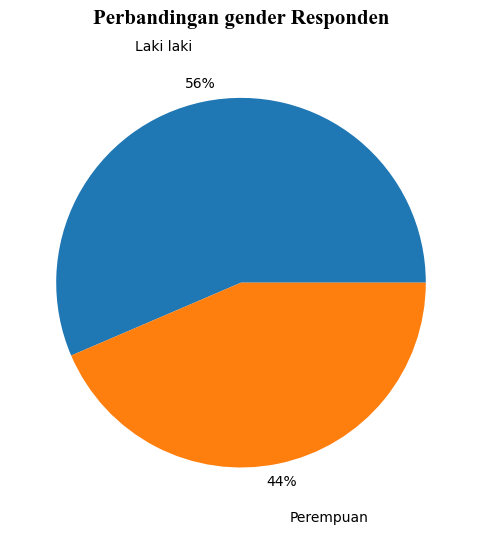

In [64]:
fig, ax = plt.subplots()
ax.pie(gender_pengisi, labels=gender_pengisi.index, autopct='%1.0f%%', pctdistance=1.1 , labeldistance=1.3)
ax.set_title('Perbandingan gender Responden', fontname="Times New Roman", size=15,fontweight="bold", pad=20)
plt.show()


##### Persentase Tingkatan Pendidikan Pengisi Kuisioner

In [65]:
pendidikan_pengisi = data_kuisioner.Tingkatan_Pendidikan.value_counts()
pendidikan_pengisi

SMA/SMK      241
Mahasiswa      7
Name: Tingkatan_Pendidikan, dtype: int64

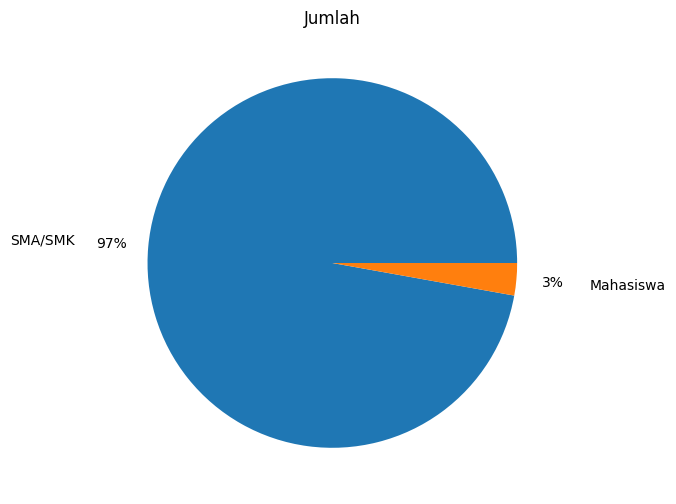

In [66]:
plt.title("Jumlah")
plt.pie(pendidikan_pengisi, labels=pendidikan_pengisi.index, autopct='%1.0f%%', pctdistance=1.2 , labeldistance=1.4)
plt.show()

##### Tingkat Umur Pengisi Kuisioner

In [67]:
ter_muda = data_kuisioner["Umur"].min()
ter_tua = data_kuisioner["Umur"].max()
rata_rata_umur = data_kuisioner["Umur"].mean()

print(f"""
Termuda  \t: {ter_muda}
Tertua   \t: {ter_tua}
rata-rata \t: {rata_rata_umur}
""")


Termuda  	: 14
Tertua   	: 24
rata-rata 	: 16.68951612903226



In [68]:
def createHorizontalBar(
    index, 
    values, 
    xlabel="Kuantitas", 
    ylabel="value", 
    title="Persebaran", 
    placing="upper right",
    isInverted=False
    ):

    y_pos = np.arange(len(index))
    fig, ax = plt.subplots(figsize=(15,6))

    hbars = ax.barh(
        y_pos, 
        values, 
        align="center", 
        color=['tab:red', 'tab:blue', 'tab:orange', 'tab:purple', 'tab:green', 'tab:pink', 'coral', 'springgreen'],
        label=values
    )
    if(isInverted):
        ax.invert_xaxis()
    ax.bar_label(hbars, fmt='%.2f')
    ax.legend(index,loc=placing)
    ax.set_yticks(y_pos, index)
    ax.invert_yaxis()
    ax.set_xlabel(xlabel, size=13)
    ax.set_ylabel(ylabel, size=13)
    ax.set_title(title, size=15,fontweight="bold", pad=20)

    plt.show()



def createPieChart(
        value,
        index,
        title
    ):
    fig, ax = plt.subplots()

    ax.pie(
        value, labels=index, 
        autopct='%1.0f%%', pctdistance=1.1 , labeldistance=1.3,
        colors=['tab:red', 'tab:blue', 'tab:orange', 'tab:purple', 'tab:green', 'tab:pink', 'coral', 'springgreen'],        
        )
    ax.set_title(title, fontname="Times New Roman", size=15,fontweight="bold", pad=20)
    plt.show()

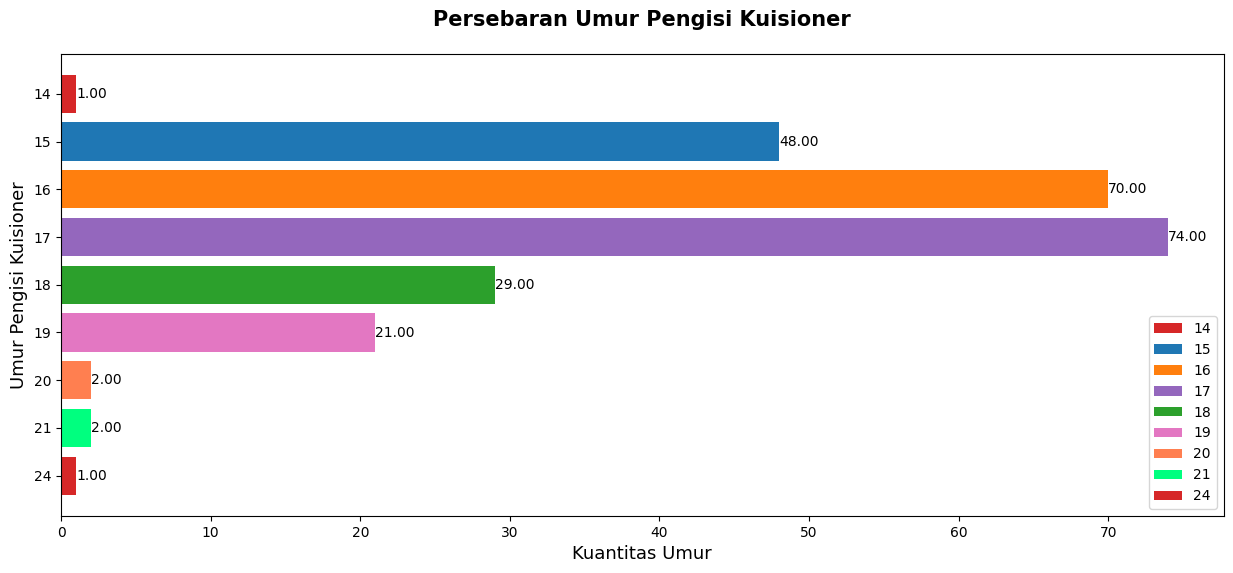

In [69]:
persebaran_umur = data_kuisioner["Umur"].value_counts().sort_index()
umur = persebaran_umur.index
banyak_umur = persebaran_umur.values

createHorizontalBar(
    umur, 
    banyak_umur, 
    xlabel="Kuantitas Umur", 
    ylabel="Umur Pengisi Kuisioner", 
    title="Persebaran Umur Pengisi Kuisioner",
    placing="lower right"
)


##### Pengetahuan Pengisi Kuisioner Terhadap Bisnis Digital (skala 1-5)

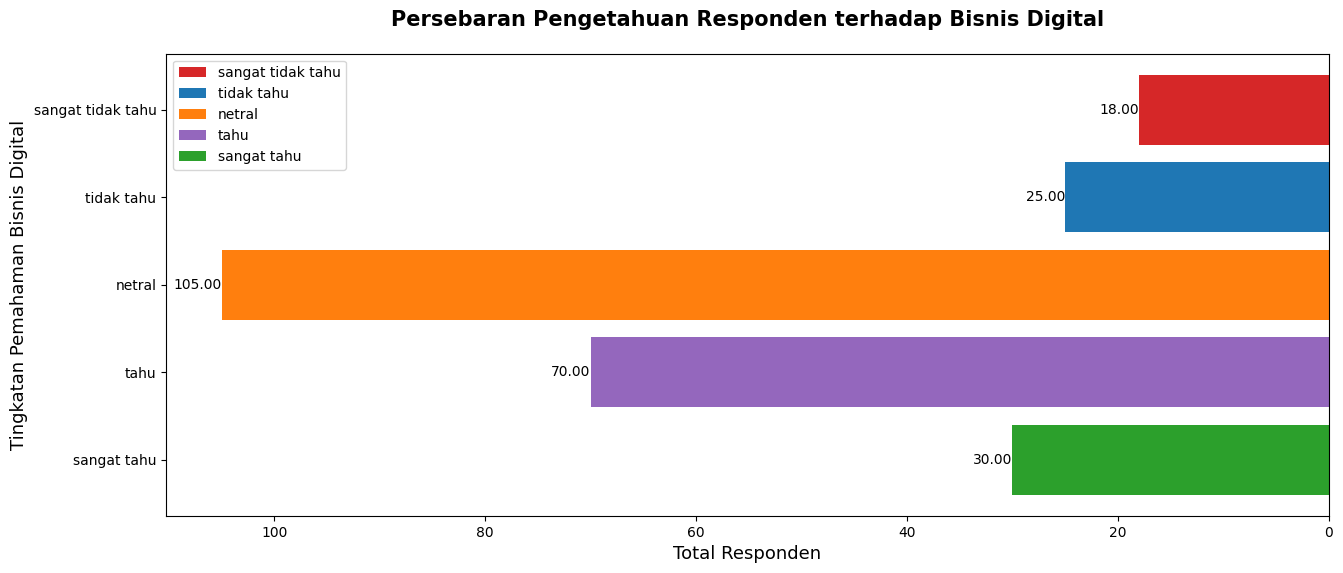

3.0


In [114]:
persebaran_pd = data_kuisioner["Pengetahuan_Bisnis_Digital"].value_counts().sort_index()
tingkatan_pd = persebaran_pd.index
jumlah_tingkatan_pd = persebaran_pd.values

createHorizontalBar(
    ["sangat tidak tahu", "tidak tahu", "netral", "tahu", "sangat tahu"], 
    jumlah_tingkatan_pd, 
    xlabel="Total Responden", 
    ylabel="Tingkatan Pemahaman Bisnis Digital", 
    title="Persebaran Pengetahuan Responden terhadap Bisnis Digital",
    isInverted=True,
    placing="upper left"
)

print(data_kuisioner["Pengetahuan_Bisnis_Digital"].median())

##### Persebaran Pengetahuan responden Terhadap E-Commerce

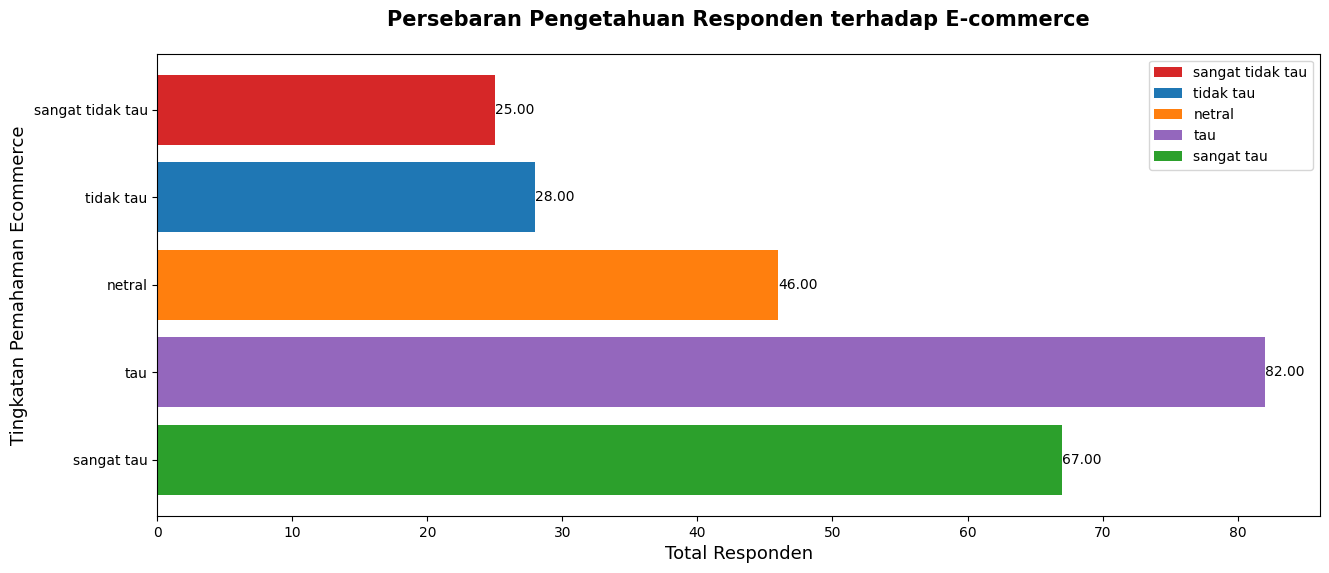

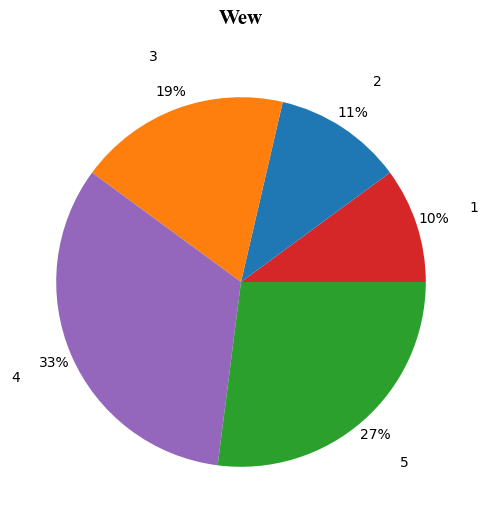

In [71]:
persebaran_pe = data_kuisioner["Pengetahuan_ECommerce"].value_counts().sort_index()
tingkatan_pe = persebaran_pe.index
jumlah_tingkatan_pe = persebaran_pe.values

createHorizontalBar(
    ["sangat tidak tau", "tidak tau", "netral", "tau", "sangat tau"], 
    jumlah_tingkatan_pe, 
    xlabel="Total Responden", 
    ylabel="Tingkatan Pemahaman Ecommerce", 
    title="Persebaran Pengetahuan Responden terhadap E-commerce"
)

createPieChart(persebaran_pe, tingkatan_pe, "Wew")

##### Tingkat Keinginan Untuk Membuka Usaha

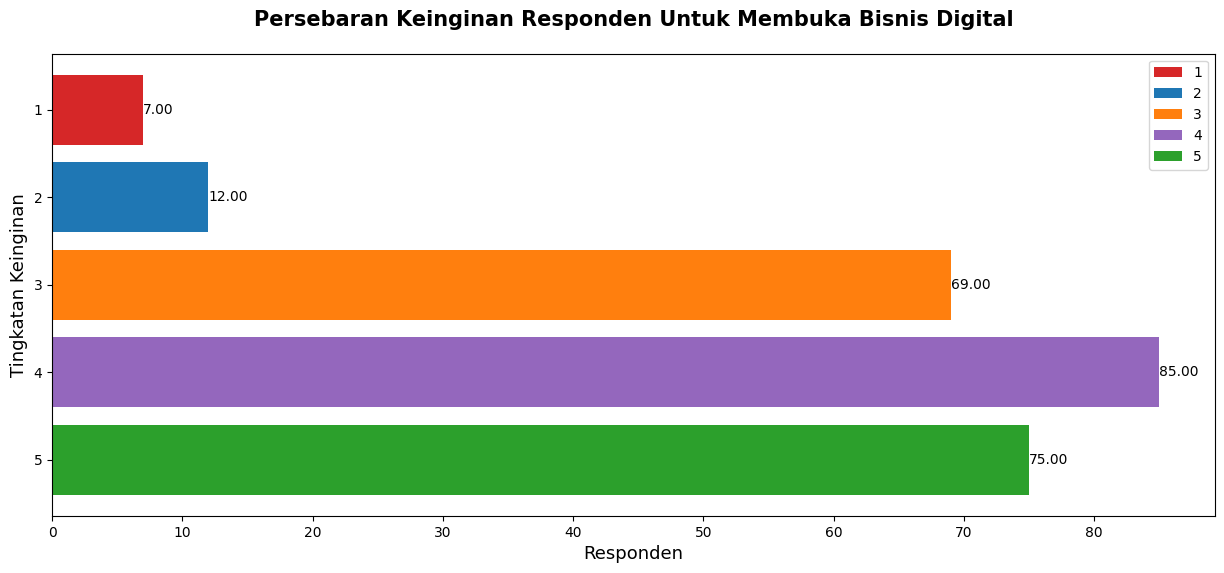

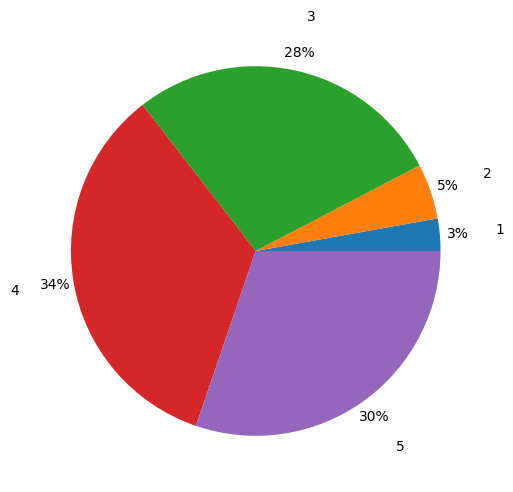

In [72]:
persebaran_bu = data_kuisioner["Keinginan_Buka_Usaha"].value_counts().sort_index()
tingkatan_bu = persebaran_bu.index
jumlah_tingkatan_bu = persebaran_bu.values


createHorizontalBar(
    tingkatan_bu, 
    jumlah_tingkatan_bu, 
    xlabel="Responden", 
    ylabel="Tingkatan Keinginan", 
    title="Persebaran Keinginan Responden Untuk Membuka Bisnis Digital"
)

plt.pie(persebaran_bu, labels=persebaran_bu.index, autopct='%1.0f%%', pctdistance=1.1 , labeldistance=1.3)
plt.show()

##### Aplikasi Ecommerce yang digunakan

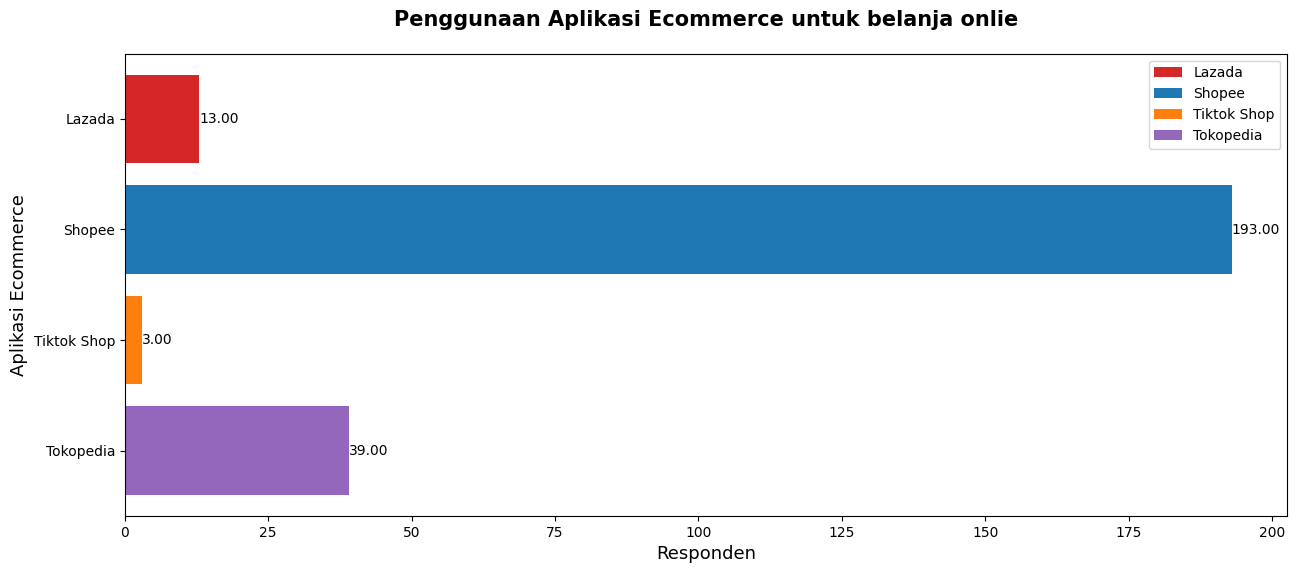

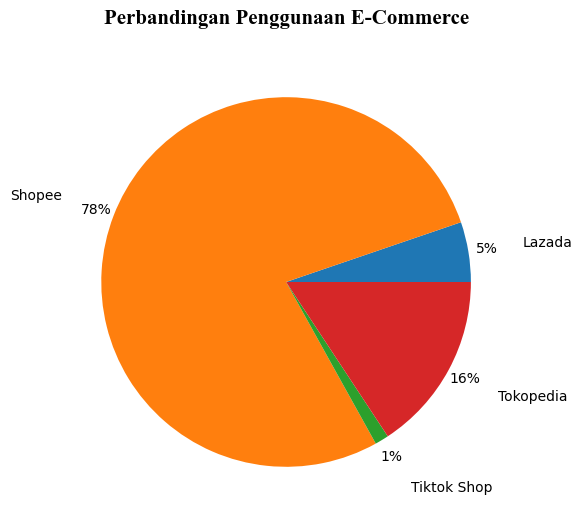

In [73]:

persebaran_aplikasi_eccommerce = data_kuisioner["Aplikasi_Ecommerce"].value_counts().sort_index()
tingkatan_aplikasi_eccommerce = persebaran_aplikasi_eccommerce.index
jumlah_tingkatan_aplikasi_eccommerce = persebaran_aplikasi_eccommerce.values

createHorizontalBar(
    tingkatan_aplikasi_eccommerce, 
    jumlah_tingkatan_aplikasi_eccommerce, 
    xlabel="Responden", 
    ylabel="Aplikasi Ecommerce", 
    title="Penggunaan Aplikasi Ecommerce untuk belanja onlie"
)

fig, ax = plt.subplots()
ax.pie(persebaran_aplikasi_eccommerce, labels=persebaran_aplikasi_eccommerce.index, autopct='%1.0f%%', pctdistance=1.1 , labeldistance=1.3)
ax.set_title('Perbandingan Penggunaan E-Commerce', fontname="Times New Roman", size=15,fontweight="bold", pad=20)
plt.show()

# plt.pie(persebaran_aplikasi_eccommerce, labels=persebaran_aplikasi_eccommerce.index, autopct='%1.0f%%', pctdistance=1.1 , labeldistance=1.3)
# plt.show()



#### Jenis Barang Yang biasa dibeli responden

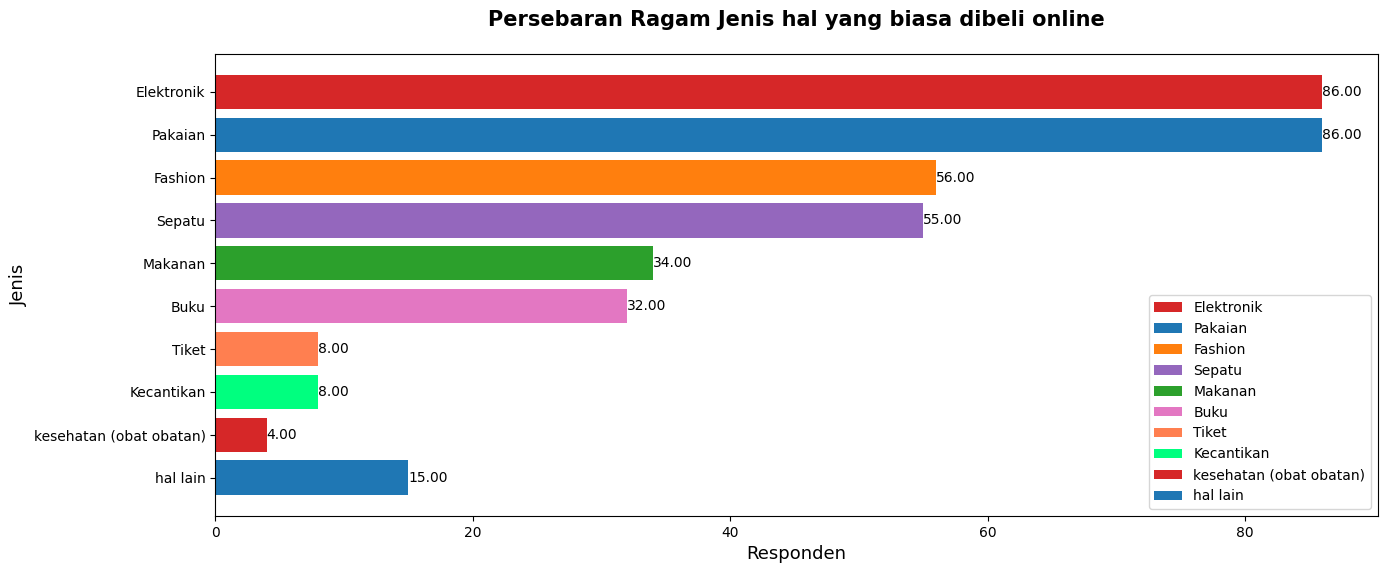

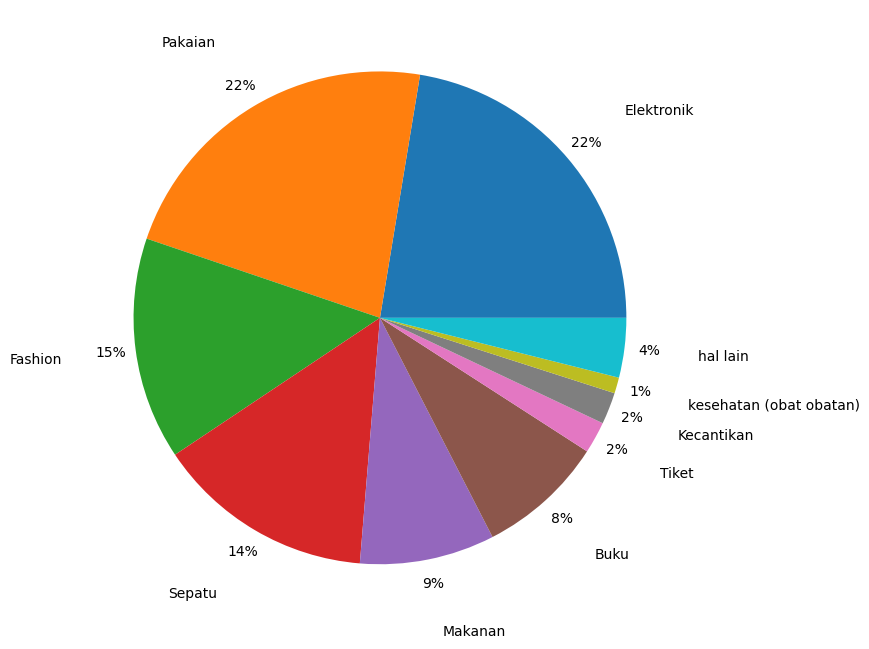

In [103]:
default_values = ["Elektronik", "Fashion", "Pakaian", "kesehatan (obat obatan)", "Tiket", "Buku", "Makanan", "Kecantikan", "Sepatu"]

jenis_barang = data_kuisioner[data_kuisioner.Jenis_kelamin == "Laki laki"].Jenis_Barang.apply(lambda x: x.split(", ")).explode().value_counts()

dataDefault = jenis_barang.loc[jenis_barang.index.isin(values=default_values)]
others = pd.Series({"hal lain" : jenis_barang.loc[~jenis_barang.index.isin(values=default_values)].sum()})

dataFinal = pd.concat([dataDefault, others])

createHorizontalBar(
    dataFinal.index, 
    dataFinal.values, 
    xlabel="Responden", 
    ylabel="Jenis", 
    title="Persebaran Ragam Jenis hal yang biasa dibeli online",
    placing="lower right"

)

plt.pie(dataFinal, labels=dataFinal.index, autopct='%1.0f%%', pctdistance=1.1 , labeldistance=1.3)
plt.show()


##### Waktu Belanja yang biasa dilakukan responden

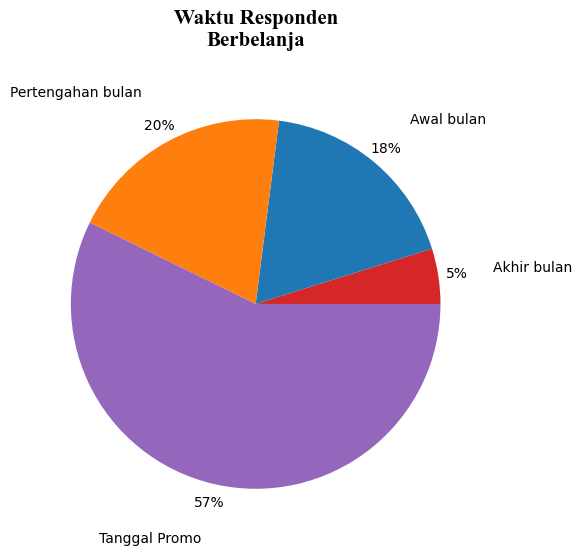

In [75]:

waktu_belanja_online = data_kuisioner.Waktu_Belanja_Online.value_counts().sort_index()

createPieChart(waktu_belanja_online.values, waktu_belanja_online.index, "Waktu Responden\nBerbelanja")
# fig, ax = plt.subplots()
# ax.pie(waktu_belanja_online, labels=waktu_belanja_online.index, autopct='%1.0f%%', pctdistance=1.1 , labeldistance=1.3)
# ax.set_title('Waktu Responden\nBerbelanja', fontname="Times New Roman", size=15,fontweight="bold", pad=20)
# plt.show()


##### Faktor Responden Mau berbelanja Online

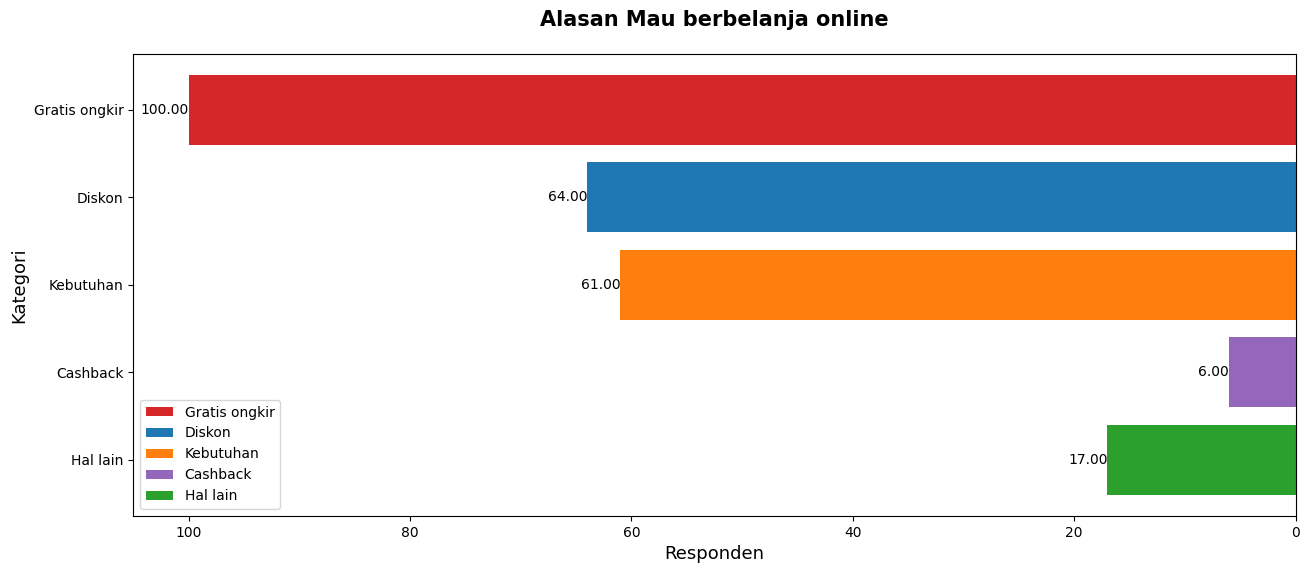

In [76]:
default_val = data_kuisioner.Faktor_Tertarik_Belanja_Online.value_counts().iloc[:4]
Hal_lain = pd.Series({"Hal lain" : data_kuisioner.Faktor_Tertarik_Belanja_Online.value_counts().iloc[4:].sum()})

alasan_belanja_online = pd.concat([default_val, Hal_lain])
index_abo = alasan_belanja_online.index
value_abo = alasan_belanja_online.values

createHorizontalBar(
    index_abo, 
    value_abo, 
    xlabel="Responden", 
    ylabel="Kategori", 
    title="Alasan Mau berbelanja online",
    placing="lower left",
    isInverted=True
)


## Sub-informasi Dataset

### Korelasi Data Perempuan

##### Umur Responded Perempuan

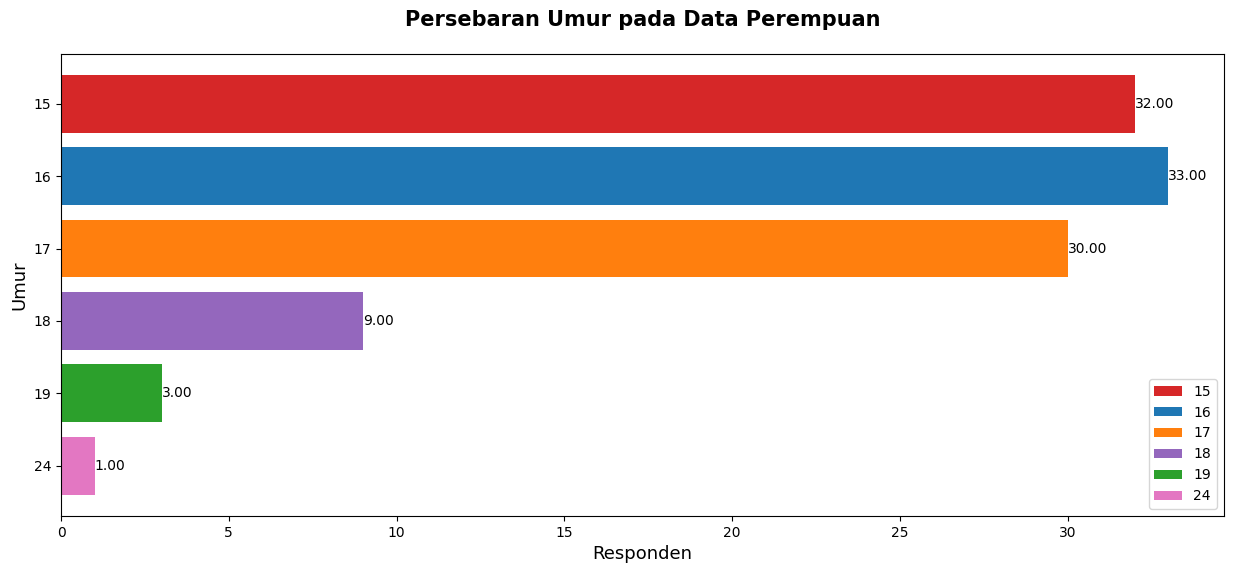

In [77]:
perempuan_umur = data_kuisioner[data_kuisioner["Jenis_kelamin"] == "Perempuan"]["Umur"].value_counts().sort_index()

createHorizontalBar(
    perempuan_umur.index, 
    perempuan_umur.values, 
    xlabel="Responden", 
    ylabel="Umur", 
    title="Persebaran Umur pada Data Perempuan",
    placing="lower right"
)

##### Persebaran Persetase Pengetahuan Bisnis Digital pada Perempuan

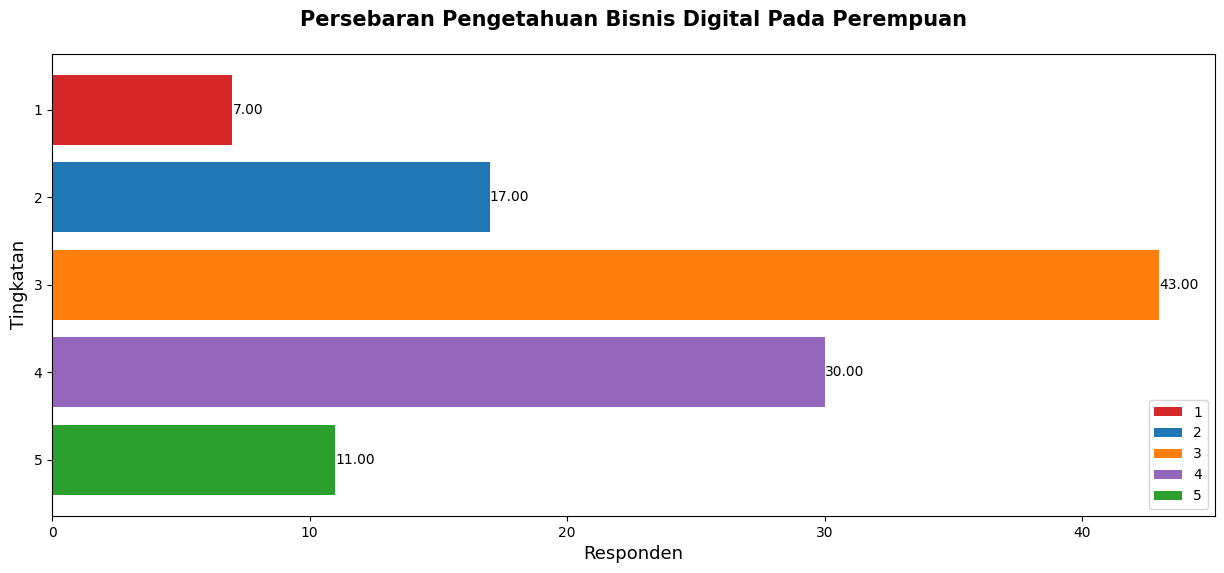

In [78]:
perempuan_pbd = data_kuisioner[data_kuisioner["Jenis_kelamin"] == "Perempuan"]["Pengetahuan_Bisnis_Digital"].value_counts().sort_index()

createHorizontalBar(
    perempuan_pbd.index, 
    perempuan_pbd.values, 
    xlabel="Responden", 
    ylabel="Tingkatan", 
    title="Persebaran Pengetahuan Bisnis Digital Pada Perempuan",
    placing="lower right"
)

##### Persebaran Terkait Pengetahuan Perempuan terhadap E-commerce

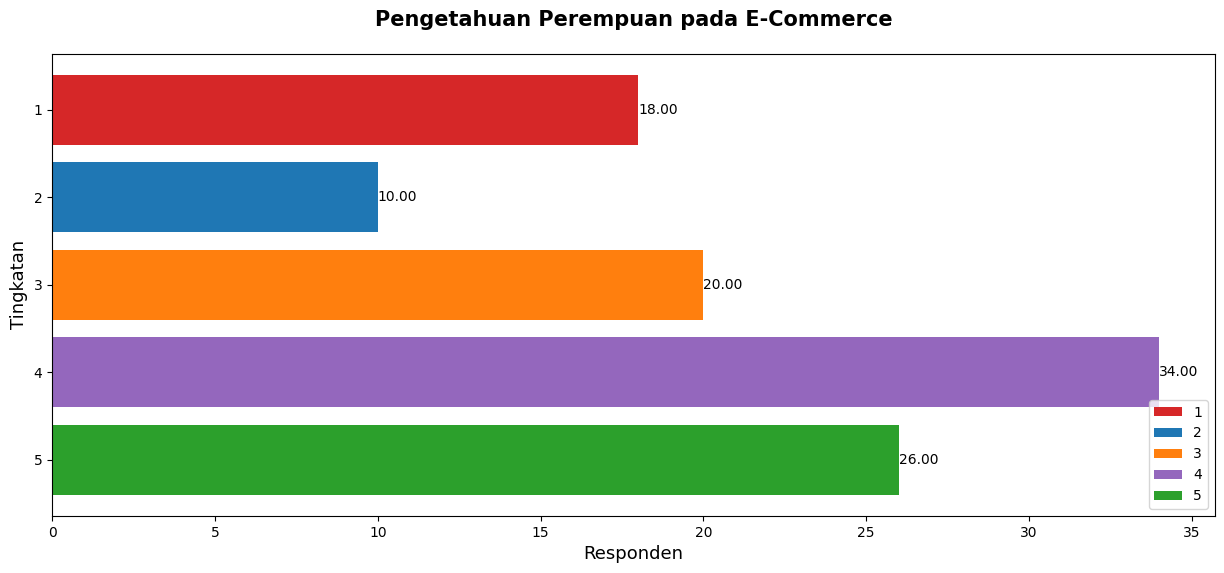

In [79]:
perempuan_pe = data_kuisioner[data_kuisioner["Jenis_kelamin"] == "Perempuan"]["Pengetahuan_ECommerce"].value_counts().sort_index()

createHorizontalBar(
    perempuan_pe.index, 
    perempuan_pe.values, 
    xlabel="Responden", 
    ylabel="Tingkatan", 
    title="Pengetahuan Perempuan pada E-Commerce",
    placing="lower right"
)

##### Persebaran Terkait Keinginan Perempuan untuk membuka Usaha

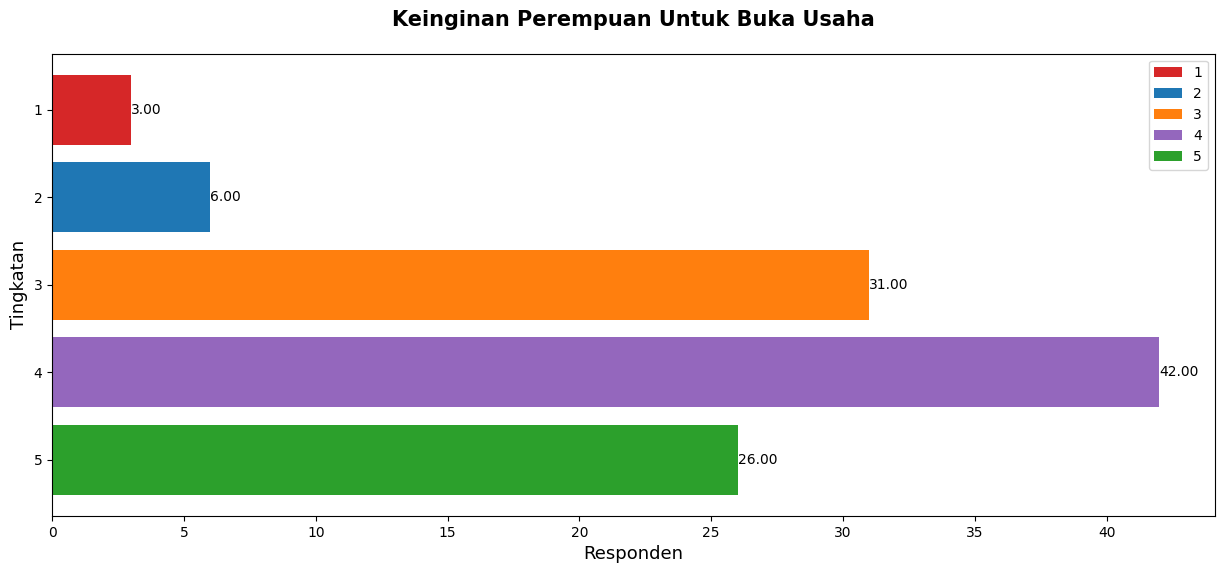

In [80]:
perempuan_mu = data_kuisioner[data_kuisioner["Jenis_kelamin"] == "Perempuan"]["Keinginan_Buka_Usaha"].value_counts().sort_index()

createHorizontalBar(
    perempuan_mu.index, 
    perempuan_mu.values, 
    xlabel="Responden", 
    ylabel="Tingkatan", 
    title="Keinginan Perempuan Untuk Buka Usaha"
)


##### Aplikasi E-Commerce yang sering dibuka oleh Perempuan

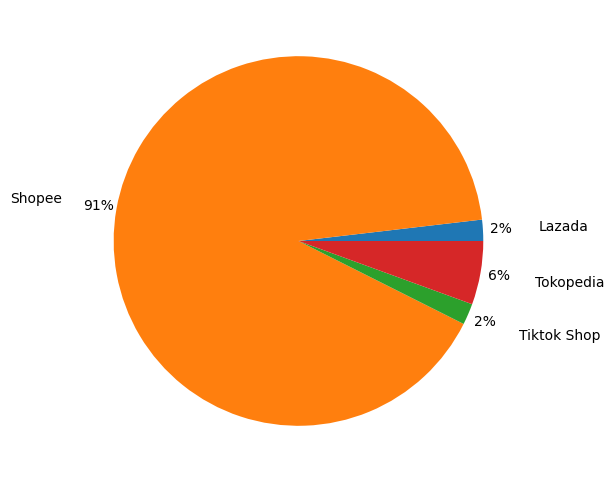

In [81]:
perempuan_eap = data_kuisioner[data_kuisioner["Jenis_kelamin"] == "Perempuan"]["Aplikasi_Ecommerce"].value_counts().sort_index()

plt.pie(perempuan_eap, labels=perempuan_eap.index, autopct='%1.0f%%', pctdistance=1.1 , labeldistance=1.3)
plt.show()

##### Jenis barang yang Sering dibeli Perempuan

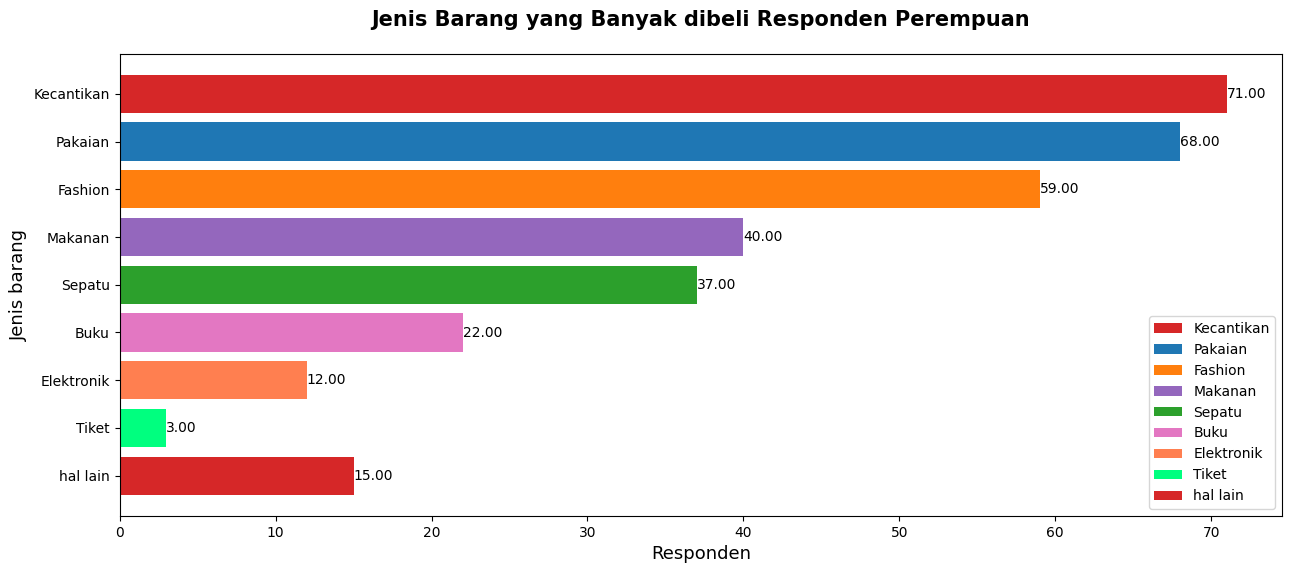

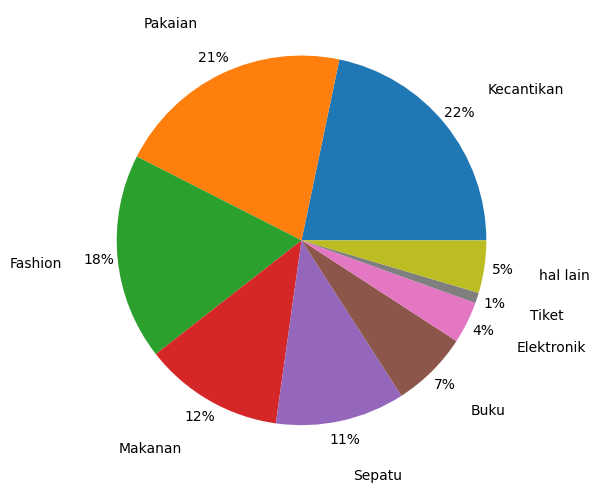

In [82]:
default_values = ["Elektronik", "Fashion", "Pakaian", "kesehatan", "Tiket", "Buku", "Makanan", "Kecantikan", "Sepatu"]

jenis_barang = data_kuisioner[data_kuisioner.Jenis_kelamin == "Perempuan"].Jenis_Barang.apply(lambda x: x.split(", ")).explode().value_counts()

dataDefault = jenis_barang.loc[jenis_barang.index.isin(values=default_values)]
others = pd.Series({"hal lain" : jenis_barang.loc[~jenis_barang.index.isin(values=default_values)].sum()})

dataFinal = pd.concat([dataDefault, others])

createHorizontalBar(
    dataFinal.index, 
    dataFinal.values, 
    xlabel="Responden", 
    ylabel="Jenis barang", 
    title="Jenis Barang yang Banyak dibeli Responden Perempuan",
    placing="lower right"

)

plt.pie(dataFinal, labels=dataFinal.index, autopct='%1.0f%%', pctdistance=1.1 , labeldistance=1.3)
plt.show()

##### Waktu Belanja yang biasa dilakukan responden Perempuan

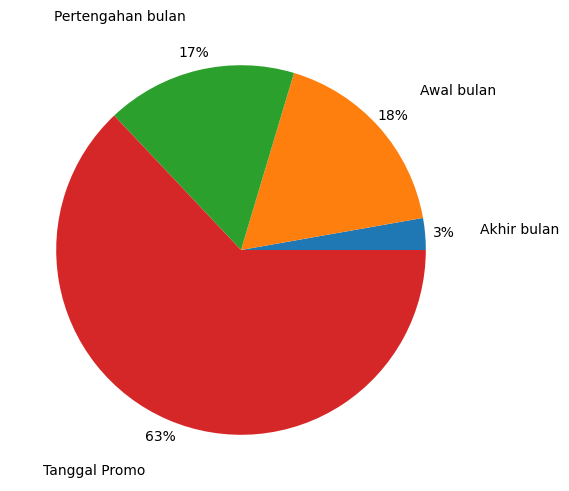

In [83]:
waktu_belanja_online = data_kuisioner[data_kuisioner.Jenis_kelamin == "Perempuan"].Waktu_Belanja_Online.value_counts().sort_index()

plt.pie(waktu_belanja_online, labels=waktu_belanja_online.index, autopct='%1.0f%%', pctdistance=1.1 , labeldistance=1.3)
plt.show()

##### Faktor yang membuat Perempuan Suka Belanja

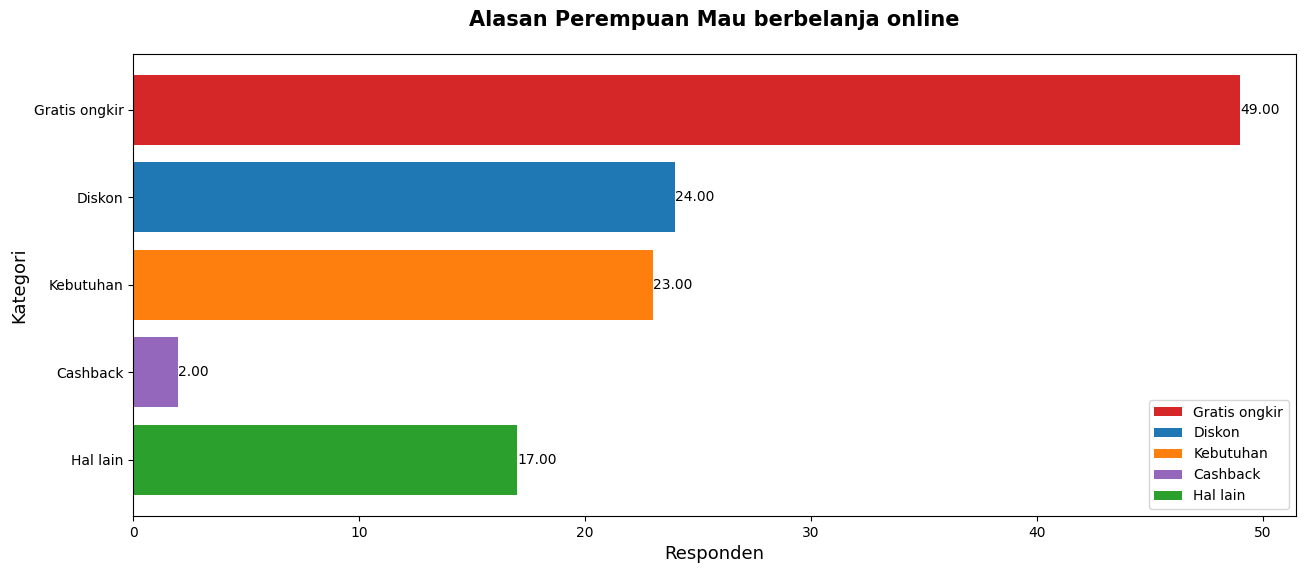

In [84]:
default_val = data_kuisioner[data_kuisioner.Jenis_kelamin == "Perempuan"].Faktor_Tertarik_Belanja_Online.value_counts().iloc[:4]
Hal_lain = pd.Series({"Hal lain" : data_kuisioner.Faktor_Tertarik_Belanja_Online.value_counts().iloc[4:].sum()})

alasan_belanja_online = pd.concat([default_val, Hal_lain])
index_abo = alasan_belanja_online.index
value_abo = alasan_belanja_online.values

createHorizontalBar(
    index_abo, 
    value_abo, 
    xlabel="Responden", 
    ylabel="Kategori", 
    title="Alasan Perempuan Mau berbelanja online",
    placing="lower right"
)

## Perbandingan pria dan wanita

In [85]:
pria = data_kuisioner[data_kuisioner.Jenis_kelamin == "Laki laki"]
wanita = data_kuisioner[data_kuisioner.Jenis_kelamin == "Perempuan"]

In [86]:
def create_diagram_komparasi(
    pria, wanita, labels, title, loc="upper right"
    ):

    x = np.arange(len(labels))  # the label locations
    width = 0.4  # the width of the bars

    fig, ax = plt.subplots()

    rects1 = ax.bar(x - width/2, pria, width, label='Pria')
    rects2 = ax.bar(x + width/2, wanita, width, label='Wanita')

    ax.set_ylabel('Nilai', size=13)
    ax.set_title(title, size=15,fontweight="bold", pad=20)
    ax.set_xticks(x, labels)
    ax.legend(loc=loc)
    

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()

    plt.show()


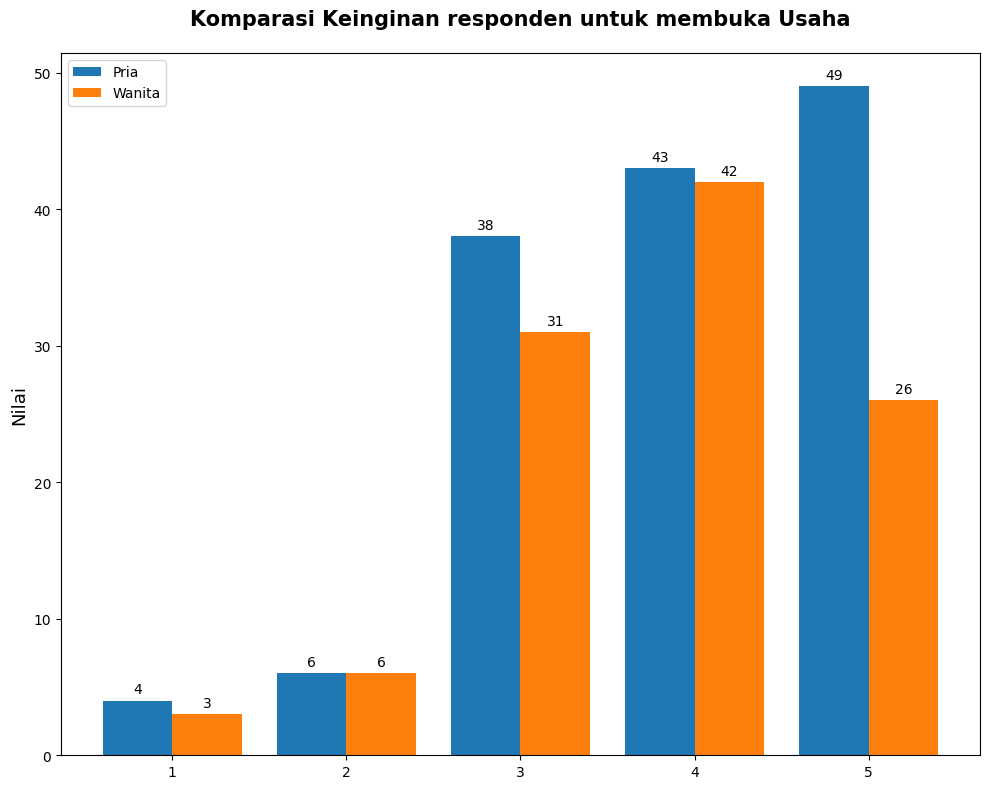

In [102]:
plt.rcParams["figure.figsize"] = (10, 8)

mau_usaha_wanita = wanita["Keinginan_Buka_Usaha"].value_counts().sort_index()
mau_usaha_pria = pria["Keinginan_Buka_Usaha"].value_counts().sort_index()

muw_series = pd.Series(mau_usaha_wanita)
mup_series = pd.Series(mau_usaha_pria)

create_diagram_komparasi(mup_series, muw_series, np.arange(1,6), "Komparasi Keinginan responden untuk membuka Usaha", loc="upper left")


##### Pengetahuan Responden Terhadap Ecommerce

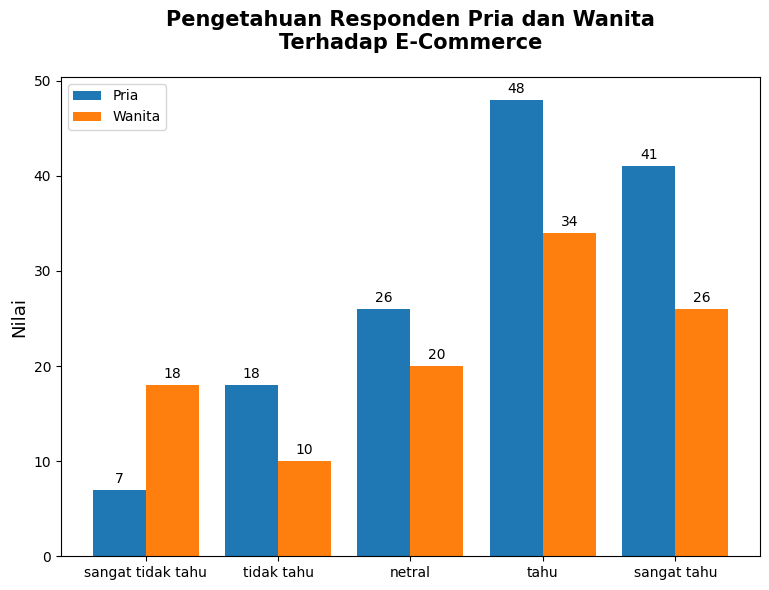

In [88]:
pengetahuan_labels = data_kuisioner.Pengetahuan_ECommerce.unique()
pengetahuan_pria = pria.Pengetahuan_ECommerce.value_counts().sort_index()
pengetahuan_wanita = wanita.Pengetahuan_ECommerce.value_counts().sort_index()

pp_series = pd.Series(pengetahuan_pria, index=pengetahuan_labels).sort_index()
pw_series = pd.Series(pengetahuan_wanita, index=pengetahuan_labels).sort_index()

create_diagram_komparasi(pp_series, pw_series, ["sangat tidak tahu", "tidak tahu", "netral", "tahu", "sangat tahu"], "Pengetahuan Responden Pria dan Wanita\nTerhadap E-Commerce", loc="upper left")




##### Penggunaan E-commerce

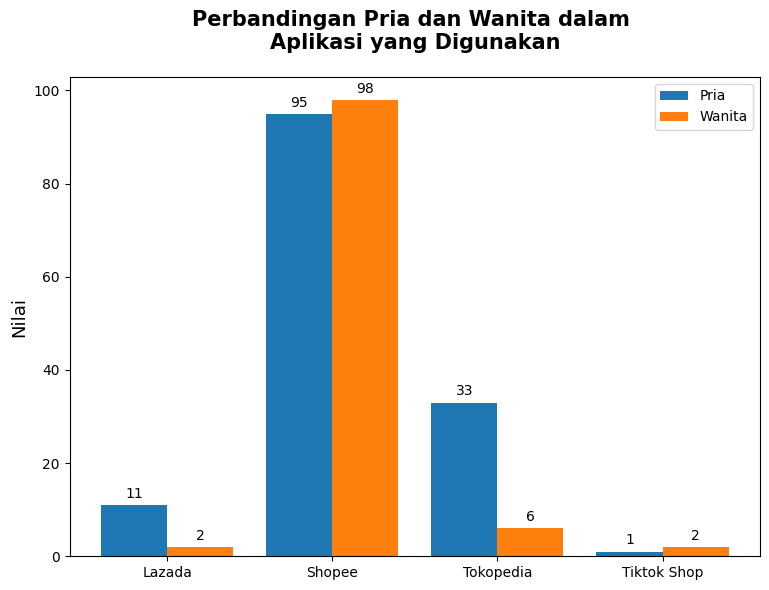

In [89]:
ecommerce_labels = data_kuisioner.Aplikasi_Ecommerce.unique()

ecommerce_pria = pria.Aplikasi_Ecommerce.value_counts()
ecommerce_wanita = wanita.Aplikasi_Ecommerce.value_counts()

ep_series = pd.Series(ecommerce_pria, index=ecommerce_labels).values
ew_series = pd.Series(ecommerce_wanita, index=ecommerce_labels).values

create_diagram_komparasi(ep_series, ew_series, ecommerce_labels, 'Perbandingan Pria dan Wanita dalam \nAplikasi yang Digunakan')


##### Kategori Barang Ecommerce yang dibeli

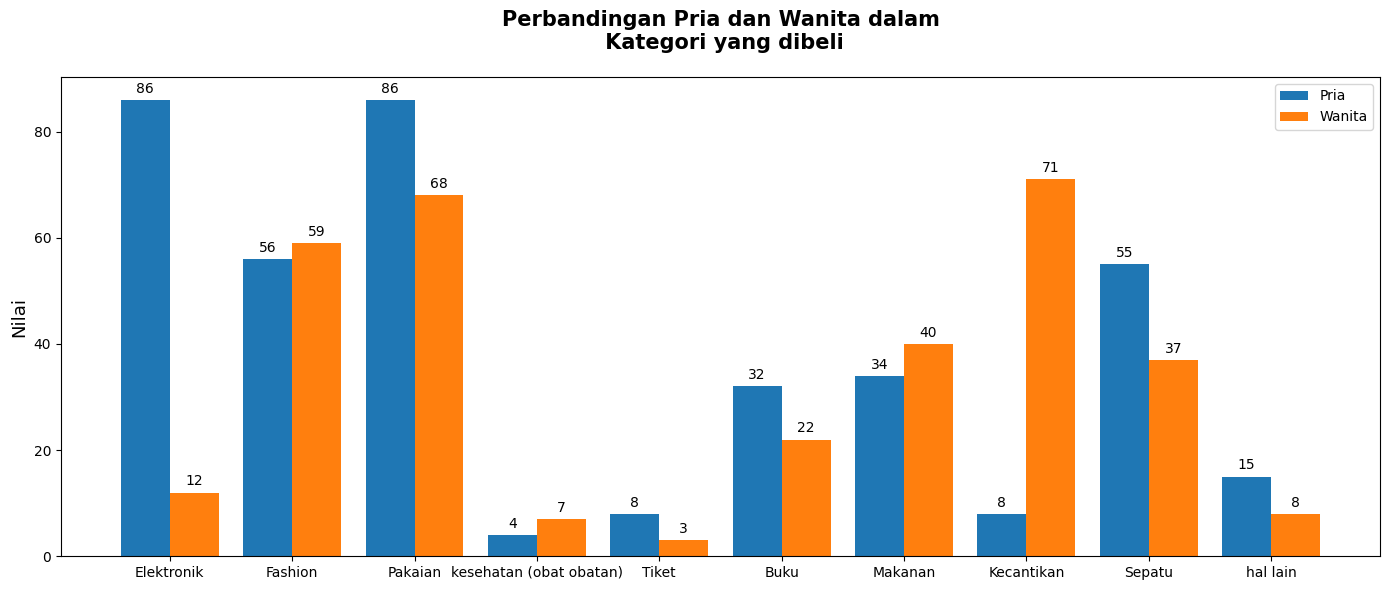

In [90]:
plt.rcParams["figure.figsize"] = (14,6)
default_values = ["Elektronik", "Fashion", "Pakaian", "kesehatan (obat obatan)", "Tiket", "Buku", "Makanan", "Kecantikan", "Sepatu", "hal lain"]

jenis_barang_pria = pria.Jenis_Barang.apply(lambda x: x.split(", ")).explode().value_counts()
jenis_barang_wanita = wanita.Jenis_Barang.apply(lambda x: x.split(", ")).explode().value_counts()

dataDefault_pria = jenis_barang_pria.loc[jenis_barang_pria.index.isin(values=default_values)]
dataDefault_wanita = jenis_barang_wanita.loc[jenis_barang_wanita.index.isin(values=default_values)]

others_pria = pd.Series({"hal lain" : jenis_barang_pria.loc[~jenis_barang_pria.index.isin(values=default_values)].sum()})
others_wanita = pd.Series({"hal lain" : jenis_barang_wanita.loc[~jenis_barang_wanita.index.isin(values=default_values)].sum()})


dataFinal_pria = pd.Series(pd.concat([dataDefault_pria, others_pria]), index=default_values)
dataFinal_wanita = pd.Series(pd.concat([dataDefault_wanita, others_wanita]), index=default_values)



create_diagram_komparasi(dataFinal_pria, dataFinal_wanita, default_values, "Perbandingan Pria dan Wanita dalam\n Kategori yang dibeli")




##### Alasan mau berbelanja online

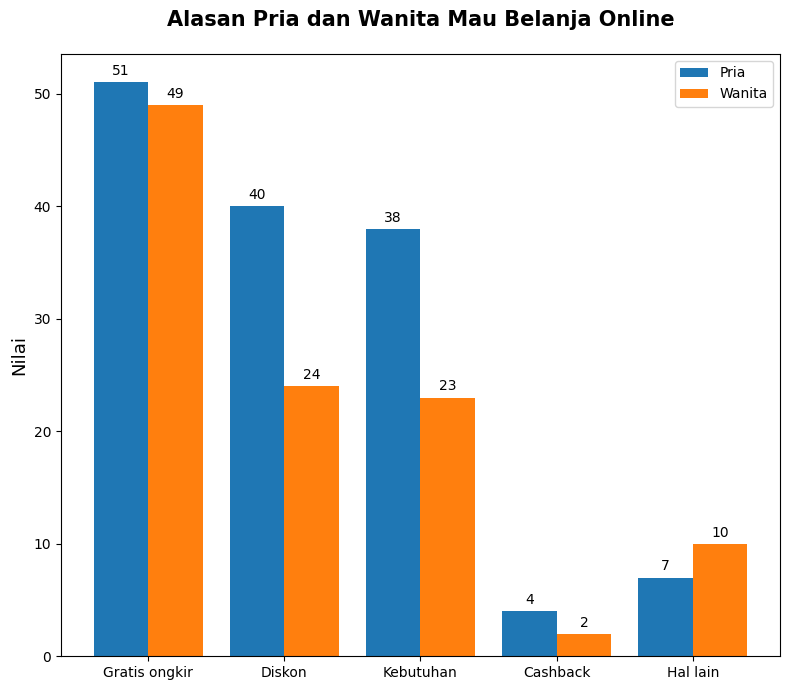

In [99]:
plt.rcParams["figure.figsize"] = (8,7)
default_values = ['Gratis ongkir', 'Diskon', 'Kebutuhan', 'Cashback', 'Hal lain']

alasan_pria = pria.Faktor_Tertarik_Belanja_Online.value_counts().iloc[:4]
alasan_wanita = wanita.Faktor_Tertarik_Belanja_Online.value_counts().iloc[:4]

hal_lain_ap = pd.Series({"Hal lain" : pria.Faktor_Tertarik_Belanja_Online.value_counts().iloc[4:].sum()})
hal_lain_aw = pd.Series({"Hal lain" : wanita.Faktor_Tertarik_Belanja_Online.value_counts().iloc[4:].sum()})

concat_ap = pd.concat([alasan_pria, hal_lain_ap])
concat_aw = pd.concat([alasan_wanita, hal_lain_aw])

create_diagram_komparasi(concat_ap, concat_aw, default_values, "Alasan Pria dan Wanita Mau Belanja Online")




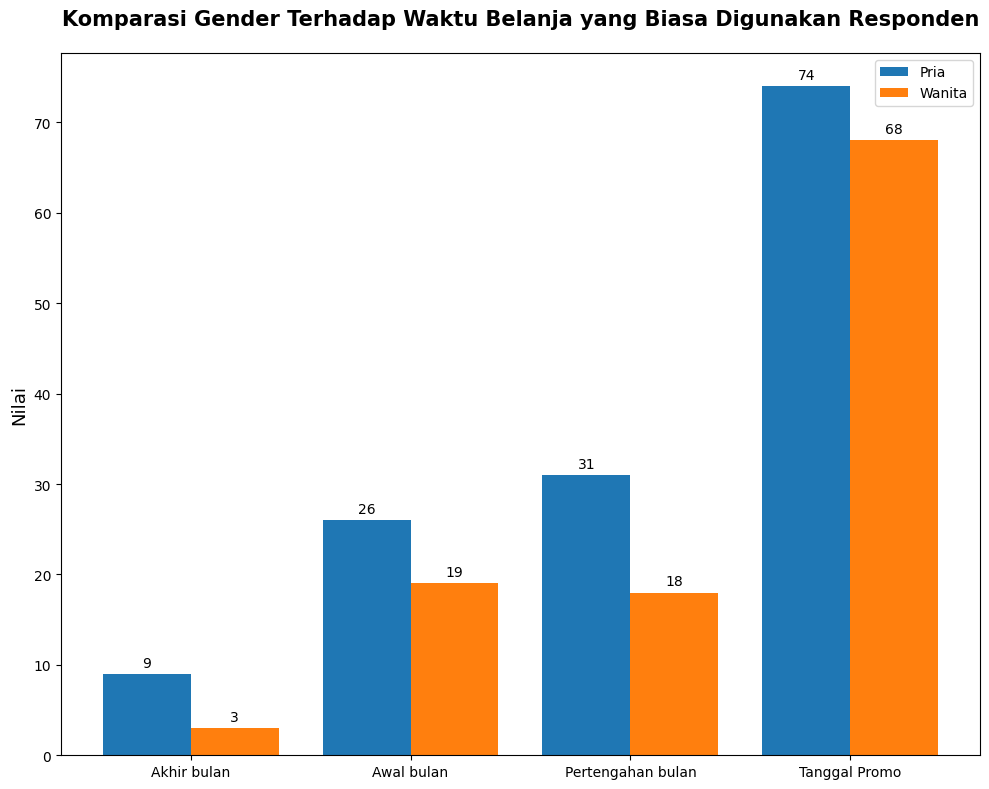

In [113]:
default_values = data_kuisioner.Waktu_Belanja_Online.value_counts().sort_index().index
waktu_belanja_online_pria = pria.Waktu_Belanja_Online.value_counts().sort_index().values
waktu_belanja_online_wanita = wanita.Waktu_Belanja_Online.value_counts().sort_index().values

wbop_series = pd.Series(waktu_belanja_online_pria)
wbow_series = pd.Series(waktu_belanja_online_wanita)

create_diagram_komparasi(wbop_series, wbow_series, default_values, "Komparasi Gender Terhadap Waktu Belanja yang Biasa Digunakan Responden")
